#  Buoi 08 | 15/05/2021 | K-mean Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/180e6NrwjpVtg67wAFsiVRNNw47jbiHUY?usp=sharing)

### Import thư viện

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

### Khởi tạo

In [4]:
means = [[2,2], [8,3], [3,6]] # Tạo các cụm có tâm lần lượt là [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]] # Phương sai là ma trận đơn vị
N = 500 # Sô lượng điểm trong cụm là 500
# Khởi tạo điểm dữ liệu
X0 = np.random.multivariate_normal(means[0], cov, N) # 500x2
X1 = np.random.multivariate_normal(means[1], cov, N) # 500x2
X2 = np.random.multivariate_normal(means[2], cov, N) # 500x2
# Nối các điểm dữ liệu 
X = np.concatenate((X0, X1, X2), axis=0) # 1500x2
K = 3
# Label vector cho từng điểm dữ liệu ban đầu
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [10]:
def kmeans_display(X, label):
  K = np.amax(label)+1
  X0 = X[label==0,:]
  X1 = X[label==1,:]
  X2 = X[label==2,:]

  plt.plot(X0[:,0], X0[:,1], 'b^', markersize=4, alpha = 0.8)
  plt.plot(X1[:,0], X1[:,1], 'go', markersize=4, alpha = 0.8)
  plt.plot(X2[:,0], X2[:,1], 'rs', markersize=4, alpha = 0.8)
  plt.axis('equal')
  plt.plot()
  plt.show()

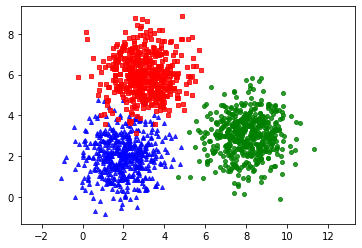

In [11]:
kmeans_display(X, original_label)

In [32]:
def kmeans_init_centers(X, k):
  return X[np.random.choice(X.shape[0], k, replace=False)]

In [33]:
def kmeans_assign_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

In [34]:
def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    Xk = X[labels == k, :]
    centers[k, :] = np.mean(Xk, axis=0)
  return centers

In [38]:
def has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [46]:
def kmeans(X, K):
  centers=[kmeans_init_centers(X, K)] # Khởi tao các centers
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers=kmeans_update_centers(X, labels[-1], K)
    if has_converged(centers[-1], new_centers): # Kiểm tra điều kiện dừng
      break
    centers.append(new_centers)
    it += 1
  return (centers, labels, it)

Centers tim duoc boi thuat toan: 
 [[1.97039435 2.03266013]
 [8.01033137 3.0298224 ]
 [3.01526309 6.01727812]]


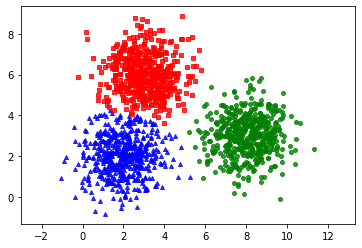

In [47]:
(centers, labels, it) = kmeans(X, K)
print('Centers tim duoc boi thuat toan: \n', centers[-1])
kmeans_display(X, labels[-1])

### Using SKlearn

In [49]:
from sklearn.cluster import KMeans

Center found by scikit-learn: 
 [[8.01033137 3.0298224 ]
 [1.96900076 2.02880828]
 [3.01457393 6.01317564]]


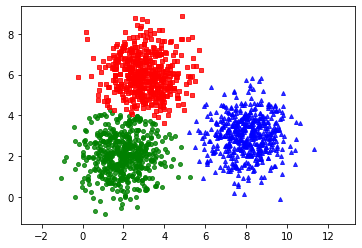

In [52]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Center found by scikit-learn: \n', kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)